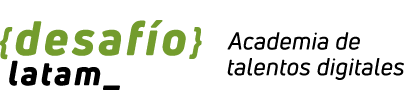



# <center><strong><font color="green">Distribución normal</font></strong></center>

## <strong><font color="green">Modelando con la distribución normal</font></strong>
Veremos como la distribución normal permite modelar algunos conjuntos de datos. Para ello necesitaremos importar algunas librerías y un conjunto de datos

### norm.pdf

* Nos ayuda a dibujar una curva teórica (la campana) basada en la media y desviación estándar de tus datos.

* No simula datos, solo nos da una idea de cómo deberían distribuirse si fueran normales.

* Es una herramienta para comparar y modelar, no para generar datos nuevos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import norm

dataset = pd.read_csv('height_weight.csv')

In [2]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
dataset.shape

(10000, 3)

In [4]:
dataset.count()


Gender    10000
Height    10000
Weight    10000
dtype: int64

El dataset contiene los datos de genero, estatura (en pulgadas) y peso (en libras) de 10000 personas. Veremos algunos indicadores para la altura.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
dataset['Height'].dropna().describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Si construimos un histograma de los datos de (Height = estatura) obtenemos lo siguiente:

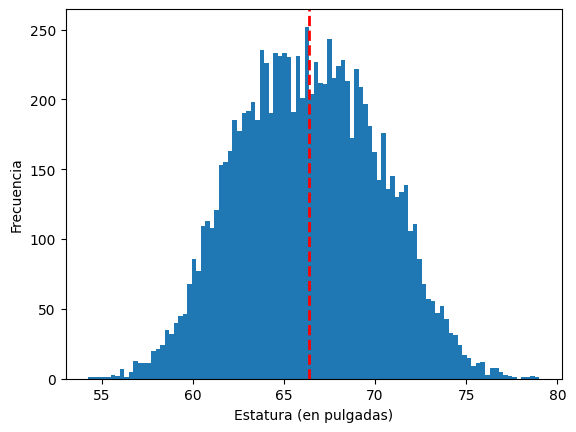

In [8]:
alturas = dataset['Height'].dropna() # asignamos la columna altura a la variable alturas

media = np.mean(alturas) # obtenemos el promedio de las alturas


plt.hist(alturas, bins=100) # llamamos a pyplot (su alias) seguido de hist, para generar un histograma, e indicamos que se divida el eje x en 100 intervalos

plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media') # insertamos la columna vertical (personalizada)

plt.xlabel('Estatura (en pulgadas)') # indicamos la etiqueta para el eje x

plt.ylabel('Frecuencia')# indicamos la etiqueta para el eje y

plt.show() # mostramos el grafico (en jupyter no es necesario indicarlo, pero siempre es mejor hacerlo)

Podemos observar que la distribución de los datos es bastante simétrica respecto de la media.




Veremos ahora como un modelo de distribucion normal puede ayudarnos a modelar esta situación.

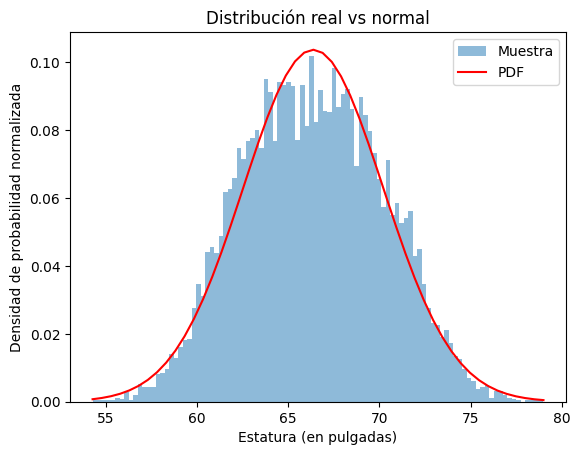

In [9]:
#Calculamos la media y la desviación estándar de los datos, además de los valores máximo y mínimo para graficar.

mu = alturas.mean()
sigma = alturas.std()
minimo=alturas.min()
maximo=alturas.max()

#Creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
x = np.linspace(minimo, maximo)

#Creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
# Notemos que "sigma" funciona como "escala"
pdf = norm.pdf(x, loc=mu, scale=sigma)


# Histograma de los datos. El parámetro "density=True" va a construir el histograma haciendo que la suma de todas 
#las áreas de las barras sea igual a 1, para que podamos representar las probabilidades

plt.hist(alturas, bins=100, density=True, alpha=0.5, label='Muestra')#alpha=0.5 da un 50% de transparencia

plt.plot(x, pdf, color='red', label='PDF') #Graficamos la distribución normal

plt.xlabel('Estatura (en pulgadas)')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribución real vs normal')
plt.legend()
plt.show()


Una vez que ya hemos comparado los datos con la distribución normal y hemos visto que se ajustan razonablemente bien, esa información tiene varias aplicaciones prácticas, como por ejemplo:

**1. Hacer predicciones**

Si nuestros datos siguen una distribución normal, podemos usar las propiedades de la distribución normal para predecir probabilidades.

Por ejemplo, si estamos modelando las alturas de una población, podemos calcular:

¿Cuál es la probabilidad de que una persona mida más de 180 cm?

¿Qué altura corresponde al 10% más bajo de la población?

Esto es útil en muchos campos, como medicina, ingeniería, economía, etc.


**2. Calcular intervalos de confianza**

Si estamos trabajando con estadísticas, la distribución normal nos permite calcular intervalos de confianza.

Por ejemplo, podemos decir: "Estamos 95% seguros de que la altura promedio de la población está entre 168 cm y 172 cm".

Esto es útil para tomar decisiones basadas en datos, sabiendo cuánta incertidumbre hay.

**3. Realizar pruebas de hipótesis**
Muchas pruebas estadísticas (como la prueba t o la prueba z) asumen que los datos siguen una distribución normal.

Si nuestros datos son normales, podemos usar estas pruebas para responder preguntas como:

¿La altura promedio de los hombres es diferente a la de las mujeres?

¿Un nuevo medicamento afecta el crecimiento de los niños?

**4. Modelar fenómenos naturales o sociales**
Muchos fenómenos en la naturaleza y la sociedad siguen una distribución normal (o aproximadamente normal).

Si nuestros datos son normales, podemos usar la distribución normal para modelar y entender esos fenómenos.

Ejemplos:

Peso de productos en una fábrica.

Calificaciones de exámenes.

Errores de medición en experimentos científicos.

**5. Generar datos sintéticos**
    
Si sabemos que nuestros datos siguen una distribución normal, podemos usar esa información para generar datos sintéticos (datos artificiales que imitan el comportamiento de los datos reales).

Esto es útil en simulaciones, pruebas de software o cuando no tenemos suficientes datos reales.

**6. Tomar decisiones basadas en probabilidades**

La distribución normal nos permite calcular probabilidades de eventos.

Por ejemplo:

Si estamos diseñando ropa, podemos calcular qué tallas son más comunes.

Si estamos planificando la altura de puertas, podemos asegurarnos de que el 99% de las personas pasen sin agacharse.



¿Y si comparamos ahora los pesos, para hombres y mujeres por separado? Vamos a extraer los datos

In [10]:
hombres = dataset[dataset['Gender']=='Male']['Weight']
mujeres = dataset[dataset['Gender']=='Female']['Weight']

Definiremos ahora una función que nos permita modelar un conjunto de datos con a distribución normal

In [11]:
def get_psd(x):
  mu=x.mean()
  sigma=x.std()
  minimo=x.min()
  maximo=x.max()
  x = np.linspace(minimo, maximo)
  pdf = norm.pdf(x, loc=mu, scale=sigma)
  return(x,pdf)



Con esto, ya podemos hacer nuestra comparación

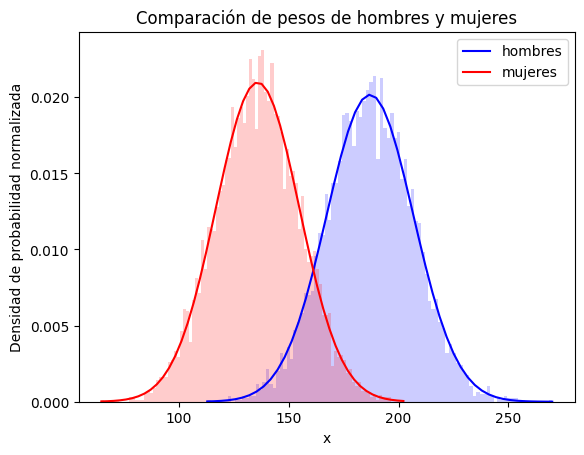

In [24]:
x,pdf=get_psd(hombres)
plt.plot(x , pdf, color='blue', label='hombres')

x,pdf=get_psd(mujeres)
plt.plot(x , pdf, color='red', label='mujeres')

plt.hist(hombres, bins=100, density=True, alpha=0.2, color='blue')
plt.hist(mujeres, bins=100, density=True, alpha=0.2, color='red')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Comparación de pesos de hombres y mujeres')
plt.legend()
plt.show()

## <strong><font color="green">Parámetros la distribución normal</font></strong>

¿Cuál puede ser la importancia de los parámetros de una distribución normal? 


Como hemos mencionado, la media de los datos constituye un **eje de simetria** de la curva. Mientras mayor sea esta media, este eje estará más desplazado hacia la derecha. En el gráfico anterior puedes ver que el promedio para los hombres es mayor, lo que hace que el gráfico esté desplazado hacia la derecha en comparación al de las mujeres.

Para analizar el rol que cumple la desviación estándar, veremos algunos ejemplos de distribuciones normales con la misma media pero diferentes desviaciones.

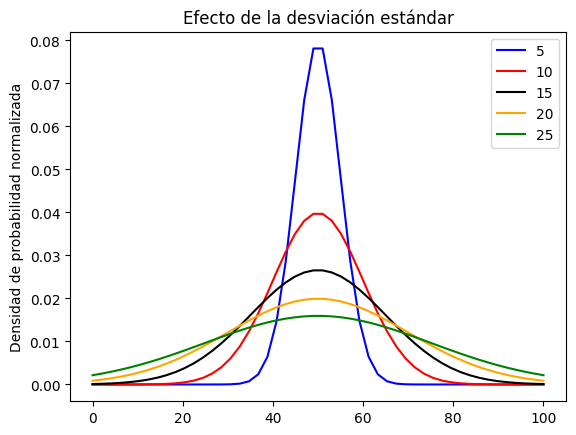

In [13]:
x = np.linspace(0, 100)# consideraremos un rango de valores entre 0 y 100

desv={5:'blue',10:'red',15:'black',20:'orange',25:'green'}

for clave,valor in desv.items():
  pdf = norm.pdf(x, loc=50, scale=clave)
  plt.plot(x, pdf, color=valor, label=clave)

plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Efecto de la desviación estándar')
plt.legend()
plt.show()

¿Qué ocurre cuando aumenta el valor de sigma?

## <strong><font color="green">Aplicación la distribución normal</font></strong>

Considerando el modelamiento anterior, vamos a comparar los resultados "reales" (es decir, considerando la lista de datos) con lo que predice un modelo basado en la distribución normal. Específicamente, nos preguntaremos ¿cuál es la probabilidad de que una persona al azar mida 72 pulgadas o menos?

Nuestra primera alternativa es determinar a qué percentil corresponde 72 en el conjunto de datos. Para esto necesitaremos cargar una librería.


### ¿Qué es norm.cdf?

**norm.cdf** es una función de la librería scipy.stats que calcula la función de distribución acumulativa (CDF) de una distribución normal. La CDF te dice la probabilidad de que una variable aleatoria tome un valor menor o igual a un valor específico.

* En otras palabras, norm.cdf responde a la pregunta:

**"¿Cuál es la probabilidad de que un valor sea menor o igual a x en una distribución normal?"**

En este ejercicio, comparamos percentiles **reales** y **teóricos (alturas_prueba)** para evaluar cómo se ajustan nuestros datos a una distribución normal. Usamos **percentileofscore** para calcular los percentiles reales y **norm.cdf** para los teóricos. Esto nos permite ver si los datos siguen una distribución normal y entender su comportamiento. Por ejemplo, si el percentil real y teórico para una altura de 72 pulgadas son cercanos (92.71 vs 92.84), sugiere un buen ajuste al modelo normal. Este análisis es útil para predecir probabilidades y tomar decisiones basadas en datos.

In [14]:
from scipy.stats import percentileofscore
alturas_prueba = [70,72,80,82,90,92]

for i in alturas_prueba:
  p_real=round(percentileofscore(alturas,i),2)

  p_modelo=round(100*norm.cdf(i, loc=mu, scale=sigma),2)

  print(f'El percentil real para {i} es {p_real}, y el teórico es {p_modelo}')

El percentil real para 70 es 81.22, y el teórico es 82.74
El percentil real para 72 es 92.71, y el teórico es 92.84
El percentil real para 80 es 100.0, y el teórico es 99.98
El percentil real para 82 es 100.0, y el teórico es 100.0
El percentil real para 90 es 100.0, y el teórico es 100.0
El percentil real para 92 es 100.0, y el teórico es 100.0


In [15]:
# Si nos fijamos solo en la altura 72...

print(percentileofscore(alturas, 72))


92.71000000000001


Es decir, un 92,7% de las personas de la muestra mide 72 puldadas o menos. O, lo que es igual, la probabilidad de escoger a una persona al azar que mida 72 pulgadas o menos es 0,927, aproximadamente.

¿Qué ocurre si consideramos la función normal definida por el promedio y la desviación estándar de los datos?

In [16]:

mu = np.mean(alturas)
sigma = np.std(alturas)

# Valor específico para el cual queremos calcular la probabilidad
valor = 72

# Calcular la probabilidad acumulada
probabilidad = norm.cdf(valor, loc=mu, scale=sigma)

print("La probabilidad de obtener un valor menor o igual a", valor, "es:", probabilidad)


La probabilidad de obtener un valor menor o igual a 72 es: 0.9284009209133961


**mu** es el promedio (o media) de un conjunto de datos, en este caso las alturas. Esto representa el valor promedio de todas las alturas en el conjunto.

**sigma** es la desviación estándar, que mide cuánto se desvían los valores del conjunto respecto al promedio. Si la desviación estándar es baja, las alturas están más cercanas al promedio; si es alta, están más dispersas.

**norm.cdf** es una función que proviene de la distribución normal. Esta función nos da la probabilidad acumulada hasta un cierto punto, en este caso hasta el valor 72.

La función tiene tres parámetros:

* **valor** =  El valor específico (en este caso, 72).
* **loc** = mu: La media o promedio de los datos (el "centro" de la distribución).
* **scale** = sigma: La desviación estándar (qué tan dispersos están los datos).

La CDF nos da la probabilidad de que un valor aleatorio, proveniente de la distribución normal con media mu y desviación estándar sigma, sea menor o igual a 72.

Esto significa que hay un **92.84%** de probabilidad de que un valor, tomado aleatoriamente de esa distribución normal (es decir, alturas con un promedio y una desviación estándar determinados), sea menor o igual a 72.

**Ejemplo práctico:**

supongamos que las alturas siguen una distribución normal con media 68 pulgadas y una desviación estándar de 3 pulgadas. Cuando usamos norm.cdf(72, loc=68, scale=3), estamos preguntando: 
**"¿Cuál es la probabilidad de que una persona seleccionada al azar tenga una altura de 72 pulgadas o menos?"**

El resultado de **0.9284** nos dice que el **92.84%** de las personas están por debajo o en ese valor.

## Realizamos una modificación de la data

Vamos a agregar informacion acerca de fumadores y no fumadores

In [17]:
import pandas as pd
import numpy as np

# Cargar el dataset
dataset = pd.read_csv('height_weight.csv')

# Definir el tamaño del dataset
total = len(dataset)

# Generar una nueva columna 'Smoker' con 61% fumadores (1) y 39% no fumadores (0)
dataset['Smoker'] = np.random.choice([True, False], size=total, p=[0.61, 0.39])

# Ver las primeras filas para verificar el resultado
dataset.head()

,Gender,Height,Weight,Smoker
0,Male,73.847017,241.893563,True
1,Male,68.781904,162.310473,True
2,Male,74.110105,212.740856,True
3,Male,71.730978,220.042470,True
4,Male,69.881796,206.349801,True


In [18]:
dataset.Smoker.value_counts()

Smoker
True     6108
False    3892
Name: count, dtype: int64

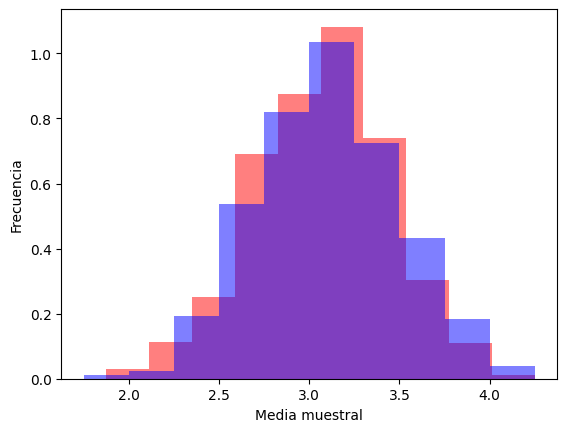

In [19]:
#Seleccionamos los datos y cambiamos los True por 1 y False por cero. Con esto calculamos la probabilidad

datos = dataset['Smoker'].dropna()
fuma = np.where(datos, 1, 0)
p=sum(fuma)/len(fuma)

#Generamos las muestras "teoricas" con la distribución binomial, y almacenamos las medias muestrales
medias_binom=[]
for j in range(1000):
  medias_binom.append(np.mean(np.random.binomial(5,p,size=8)))

#escogemos ahora las 1000 muestras de tamaño 8 a partir de los datos reales, y hacemos lo mismo
medias=[]
for k in range(1000):
  muestra=[]
  for t in range(8):
    muestra.append(sum(np.random.choice(fuma,size=5,replace=False)))
  medias.append(np.mean(muestra))

plt.hist(medias_binom, bins=10,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias, bins=10,density=True,alpha=0.5,color='blue', label='Real')

plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()

Estamos generando 1000 muestras teóricas a partir de un modelo binomial. El objetivo es simular cómo se comporta el experimento de seleccionar 5 registros al azar repetido 8 veces en cada muestra. Se Está usando la función **np.random.binomial** para generar resultados binomiales, y luego calculamos la media muestral de cada muestra. Esto lo haces 1000 veces.

en lugar de usar el modelo teórico binomial, tomamos 1000 muestras de los datos reales. En cada muestra, seleccionas 5 registros  de forma aleatoria sin reemplazo (con np.random.choice). Luego, para cada muestra calculamos la media de cuántos de esos 5 registros fuman. Esto nos da 1000 medias muestrales basadas en datos reales.

El gráfico nos muestra dos histogramas superpuestos:

* Rojo: Distribución de las medias teóricas (binomial). #np.random.binomial

* Azul: Distribución de las medias reales. # np.random.choice(fuma,size=5,replace=False

Si ambos histogramas se superponen bien, el modelo binomial es una buena representación de los datos. Si no, puede ser necesario revisar el modelo o los datos.

**Resumen**

* Teórico: Usamos la distribución binomial para simular cómo deberían comportarse los datos si siguieran ese modelo.

* Empírico: Usamos los datos reales para ver cómo se comportan en la práctica.

* Comparación: Graficamos ambas distribuciones para ver si el modelo teórico es una buena aproximación de la realidad.

## Verificación del Teorema del Límite Central (TLC)

El Teorema del Límite Central establece que, a medida que tomamos más muestras de una población (sin importar la distribución original), la distribución de las medias muestrales tenderá a aproximarse a una distribución normal.

Qué estamos haciendo en este ejercicio:

Estamos generando medias muestrales tanto a partir del modelo teórico (binomial) como de los datos reales.
Al graficar los histogramas, esperamos ver que las medias de las muestras sigan una forma que se aproxime a la distribución normal. En este caso, ambas distribuciones (real y binomial) deberían empezar a parecerse a una campana simétrica.

## ¿Para qué sirve este ejercicio?

* **Simulación de modelos teóricos:** nos permite comparar si el modelo binomial teórico es una buena aproximación de la realidad.


* **Validación del Teorema del Límite Central:** Nos muestra que, aunque los datos individuales pueden no seguir una distribución normal, las medias muestrales tenderán a aproximarse a una normalidad, lo que es uno de los resultados más importantes en estadística.


* **Comparación gráfica:** Nos ayuda a visualizar si la distribución de medias teóricas (modelo binomial) es similar a las medias obtenidas de los datos reales. Si los histogramas son similares, significa que nuestro modelo binomial representa bien el comportamiento real.

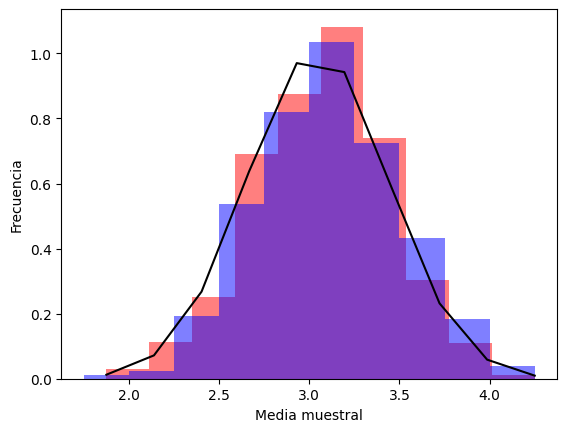

In [20]:
#Vimos que la probabilidad es p. Calculamos la media y desviación teóricas
mu=np.mean(medias)
desv=np.std(medias)
minimo=np.min(medias_binom)
maximo=np.max(medias_binom)
x = np.linspace(minimo, maximo,num=10)
pdf = norm.pdf(x, loc=mu, scale=desv)
a=np.std(medias)
b=np.std(medias_binom)
plt.hist(medias_binom, bins=10,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias, bins=10,density=True,alpha=0.5,color='blue', label='Real')
plt.plot(x, pdf, color='black', label='Dist. Normal')
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()